<img src="https://docs.google.com/uc?id=14xeXxFrVRjvOoUYWn_GuyE-v84wVzrqr" class="img-fluid" alt="CLRWY" width="400" height="200">

<a id="toc"></a>

### <p style="background-color:#0D8D99; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Difference and Similarity of NaN & None in Pandas</p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

**object==bad, float==good**

In [2]:
print("{:>20}".format("type of np.nan :"), type(np.nan))

print("{:>20}".format("type of None :"), type(None))

    type of np.nan : <class 'float'>
      type of None : <class 'NoneType'>


In [3]:
# iki nan'ı karşılaştırırsak:

print(np.nan == np.nan) # değer olarak eşit değildir. çünkü nan belirsiz bir değerdir.

print(np.nan is np.nan) 

""" is ile sorgulama yaptığınızda id değerlerini yani;
 memory location'ını sorgulamış olursunuz ki bu değerler aynıdır.
 Fakat bu; value'ları aynı demek değildir!!"""

False
True


" is ile sorgulama yaptığınızda id değerlerini yani;\n memory location'ını sorgulamış olursunuz ki bu değerler aynıdır.\n Fakat bu; value'ları aynı demek değildir!!"

In [4]:
# iki None'ı karşılaştırırsak:

print(None == None)

print(None is None)

True
True


<a id="toc"></a>

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Bir missing value olarak NaN ve None</p>

Pandas'ta, bir missing value (NA: ot available) esas olarak nan (not a number) ile temsil edilir. Bununla birlikte None'da bir missing value olarak kabul edilir.

In [63]:
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])

df0 = pd.DataFrame({
                   "categoric": gender,
                   "object dtype" : V1,
                   "float dtype" : V2,
                  })
df = df0.copy()
df

,categoric,object dtype,float dtype
0,M,2,8.0
1,F,3,NaN
2,M,5,5.0
3,F,nan,8.0
4,M,7,11.0
5,F,1,NaN
6,M,nan,NaN
7,F,10,2.0
8,M,14,3.0
9,F,-,7.0


In [64]:
df.info()

# ilk 2 sütun object, 3. sütun float dtype'ında!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   categoric     11 non-null     object 
 1   object dtype  11 non-null     object 
 2   float dtype   8 non-null      float64
dtypes: float64(1), object(2)
memory usage: 392.0+ bytes


In [65]:
# var1'in ve gender'ın ilk elemanını None yapalım.
# istediğim sütunların indeks değerlerini fancy index olarak gireceğim:

df.iloc[0, [0,1,2]] = None
df

,categoric,object dtype,float dtype
0,None,None,NaN
1,F,3,NaN
2,M,5,5.0
3,F,nan,8.0
4,M,7,11.0
5,F,1,NaN
6,M,nan,NaN
7,F,10,2.0
8,M,14,3.0
9,F,-,7.0


In [66]:
df.isnull()

,categoric,object dtype,float dtype
0,True,True,True
1,False,False,True
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,True
6,False,False,True
7,False,False,False
8,False,False,False
9,False,False,False


<a id="toc"></a>

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing value'ları doldurma</p>

In [67]:
df["object dtype"] = df["object dtype"].replace("-", np.nan).astype("float")
df.iloc[:, 0].fillna(df.iloc[:, 0].mode(), inplace=True)
df.iloc[:, 1].fillna(df.iloc[:, 1].mean(), inplace=True)
df.iloc[:, 2].fillna(df.iloc[:, 2].mean(), inplace=True)
df

,categoric,object dtype,float dtype
0,F,6.571429,6.428571
1,F,3.000000,6.428571
2,M,5.000000,5.000000
3,F,6.571429,8.000000
4,M,7.000000,11.000000
5,F,1.000000,6.428571
6,M,6.571429,6.428571
7,F,10.000000,2.000000
8,M,14.000000,3.000000
9,F,6.571429,7.000000


<a id="toc"></a>

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">NaN değerleri check etmenin 5 metodu</p>

## NaN değerleri check etmenin 5 metodu:

In [69]:
# 1. Pandas kütüphanesini kullanarak: 

import pandas as pd
nan1 = float("nan")
print(f"It's pd.isna : {pd.isna(nan1)}")


It's pd.isna : True


In [70]:
# 2. Numpy kütüphanesini kullanarak:

import numpy as np
nan2 = float("nan")
print(f"It's np.isnan : {np.isnan(nan2)}")


It's np.isnan : True


In [71]:
# 3. Math kütüphanesini kullanarak :
# (The library is applicable to all real numbers. 
# cmath library can be used if dealing with complex numbers.)

import math
nan3 = float("nan")
print(f"It's math.isnan : {math.isnan(nan3)}")


It's math.isnan : True


In [72]:
# 4. Kendisiyle karşılaştırarak. 

""" NaN değerler kendileri hakkında hiç bir şey bilmediğimiz değişik yapılardır.
Bunlar sürekli olarak şekil değiştirirler.  
Bu yüzen NaN değerleri kendisiyle kıyaslayamayız.

NaN valueları çek etmenin yaygın bir yolu da;
değişkenin kendisine eşit olup olmadığının kontrolüdür. 
Eğer eşit değilse o NaN değerdir.
"""
def isNaN(num):
    return num != num

nan4=float("nan")
isNaN(nan4)


True

In [73]:
# 5. Range’i kontrol etme:

""" Tüm float değerler eksi sonsuz ile + sonsuz  arasındadır.

infinity < any number< infinity

Ancaaak. NaN değerler bu aralık içinde değildir!!!
Bu nedenle değer eğer eksi sonsuz ile sonsuz arasına düşmüyor ise NaN valuedur."""

def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False 
    else:
        return True

nan5 = float("nan")
isNaN(nan5)


True

In [15]:
float(np.nan)
# NaN'ın float değeri nan'dır.

nan

In [10]:
float(np.nan) > 0

# NaN'lar sıfırdan büyük değerler değildir.

False

In [12]:
float(np.nan) <= 0
# NaN'lar sıfır veya sıfırdan küçük değer değildir.

False

In [14]:
float('-inf') < float(np.nan) < float('inf')
# NaN'lar eksi sonsuz ile artı sonsuz arasında bir değer değildir.

False

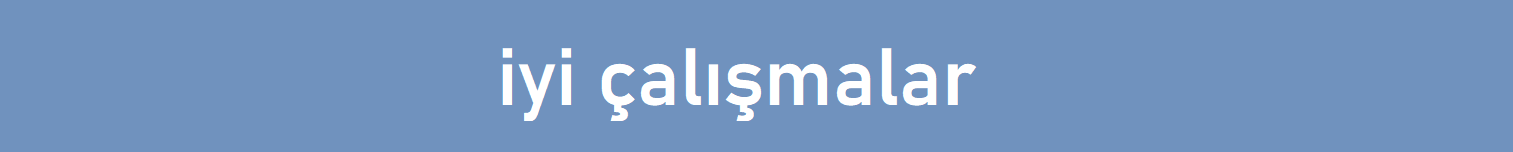

<img src="https://docs.google.com/uc?id=14xeXxFrVRjvOoUYWn_GuyE-v84wVzrqr" class="img-fluid" alt="CLRWY" width="400" height="200">